In [1]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
source_df = pd.read_csv('../csvs/students_knowledge.csv')
source_df = source_df.loc[:, ~source_df.columns.str.contains('^Unnamed')]
source_df = source_df.drop('Attribute Information:', axis=1)
source_df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [3]:
df = source_df.drop(' UNS', axis=1)
df.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [4]:
df.dtypes

STG    float64
SCG    float64
STR    float64
LPR    float64
PEG    float64
dtype: object

In [5]:
X = df.values[:,:]
X = np.nan_to_num(X)

In [6]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 1 1 2 2 1 1 3 3 1 1 3 3 3 3 2 2 2 1 2 2 1 1 3 1 1 1 3 3 1 1 2 2 1 1
 2 1 1 1 3 3 1 1 3 3 3 0 2 2 2 1 2 2 1 1 3 3 1 1 3 3 1 1 2 2 2 2 2 2 2 1 3
 3 1 1 3 3 3 1 2 2 1 1 1 2 1 1 3 3 1 1 3 3 1 1 2 2 2 1 2 2 1 1 3 3 3 1 3 3
 3 0 2 2 1 1 0 2 2 1 1 3 3 0 0 3 3 1 1 2 2 1 0 2 2 1 1 3 3 1 1 3 3 3 0 2 1
 1 0 2 2 1 1 3 3 3 0 3 3 1 1 2 2 1 2 2 0 1 2 3 3 0 1 3 3 1 0 2 2 1 0 2 2 1
 1 3 3 1 0 3 3 3 0 2 2 1 1 2 1 1 0 3 3 0 1 3 3 1 0 2 2 0 0 3 2 1 0 3 3 1 0
 3 3 1 0 2 2 0 0 2 2 1 0 3 3 1 0 3 3 1 0 2 2 1 0 2 2 0 0 3 3 1 0 3 3 1 0]


In [7]:
df["Clus_km"] = labels
df.head()

,STG,SCG,STR,LPR,PEG,Clus_km
0,0.00,0.00,0.00,0.00,0.00,2
1,0.08,0.08,0.10,0.24,0.90,2
2,0.06,0.06,0.05,0.25,0.33,2
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,1


Text(0.5, 0, 'PEG')

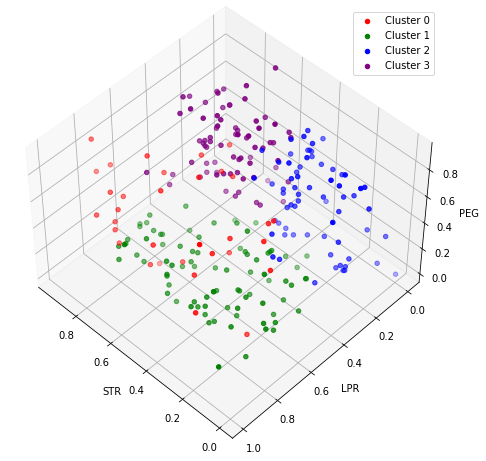

In [8]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

colors = ['red', 'green', 'blue', 'purple']
for i in range(max(labels) + 1):
    ax_df = df.where(df["Clus_km"] == i)
    ax.scatter(ax_df['STR'], ax_df['LPR'], ax_df['PEG'], c=colors[i], label='Cluster '+str(i))

ax.legend()
ax.set_xlabel('STR')
ax.set_ylabel('LPR')
ax.set_zlabel('PEG')

In [9]:
cluster_list = [i for i in range (2, 11)]
scores = []

for i in range(2, 11):
    k_means = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_avg = silhouette_score(X, labels)
    scores.append(silhouette_avg)
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

silhoutte score for n_clusters = 2 is 0.22286288452029762
silhoutte score for n_clusters = 3 is 0.21125401082369025
silhoutte score for n_clusters = 4 is 0.2066583954177949
silhoutte score for n_clusters = 5 is 0.1932617780908639
silhoutte score for n_clusters = 6 is 0.1944354498100118
silhoutte score for n_clusters = 7 is 0.18630784699964553
silhoutte score for n_clusters = 8 is 0.18563204778946948
silhoutte score for n_clusters = 9 is 0.19393212385283157
silhoutte score for n_clusters = 10 is 0.19839008702241023


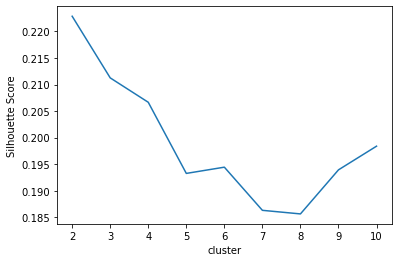

In [10]:
plt.plot(cluster_list, scores)
plt.xlabel('cluster')
plt.ylabel('Silhouette Score')
plt.show()